Import Tensorflow

In [34]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [35]:
print(tf.__version__)

2.3.0


Load Fashion MNIST data from tf.keras datasets API

In [36]:
mnist = tf.keras.datasets.fashion_mnist

Load the data into two sets of lists

In [37]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#mnist.load_data = (training_images, training_labels), (test_images, test_labels)

Visualize the input data

8
[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   0   0   0   5 

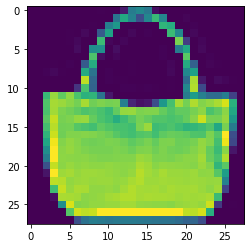

In [38]:
import numpy as np
np.set_printoptions(linewidth=200) #These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
import matplotlib.pyplot as plt
plt.imshow(training_images[100]) #Display data as an image; i.e. on a 2D regular raster
print(training_labels[100])
print(training_images[100])


As seen all the values in the number are between 0 and 255. Now, we normalize because to train neural networks it's easier if we treat all values as between 0 and 1. 

*Important to only normalize the training and testing images, not the labels!*

In [39]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Now we design the model

In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential** groups a linear stack of layers into a tf.keras.Model

**Flatten**: takes a square (28x28) image and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. 

**Relu** effectively means "If X>0 return X, else return 0" - it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer is [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it turns into [0,0,0,0,1,0,0,0,0] 




Now we build the model with .compile and then train the model with .fit using training data

In [41]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4982 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8902


Next we use test images to see the model's performance on unseen data

In [42]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8752


[0.3461175560951233, 0.8751999735832214]

Now we create a set of classifications for each of the test images

In [43]:
classifications = model.predict(test_images)
print(classifications[0])


[3.7955484e-05 1.0242005e-07 2.6979407e-07 3.0012802e-07 6.5032277e-06 1.7040767e-02 1.1010863e-05 8.6898677e-02 1.5921806e-04 8.9584517e-01]


The 10 numbers obtained show the probability that the image belongs to a particular class. 

For the test_image at position 0, the 10th value has the highest probability. so that class is obtained from the key as an ankle boot. 


In [44]:
print(test_labels[0])

9
